# 圖像基本操作
參考

https://github.com/LeBron-Jian/ComputerVisionPractice

# 電腦眼中的圖像


![](lena_img.png)


# 圖形的加載，顯示和保存


In [9]:
import cv2

# 生成圖片
img= cv2.imread("lena.jpg")

# 生成灰階圖片
imgGray=cv2.imread("lena.jpg",0)

# 展示原圖
cv2.imshow("orgimg",img)
cv2.imshow("grayimg",imgGray)
cv2.waitKey()
cv2.destroyAllWindows()
# 保存灰階圖片
cv2.imwrite("Copy.jpg",imgGray)

True

cv2.imread()的函數原型如下
```
imread(filename, flags=None)
```
- cv2.IMREAD_COLOR :彩色圖像，透明度會被忽略，默認參睥
- cv2.IMREAD_GRAYSCALE:灰階模式
- cv2.IMREAD_UNCHANGED:所有顏色通道
```
+1 = cv2.IMREAD_COLOR
0 = cv2.IMREAD_GRAYSCALE
-1 = cv2.IMREAD_UNCHANGED
```

# 視頻讀取與處理代碼

In [14]:
import cv2

# 參睥為視頻文件目錄
videoc= cv2.VideoCapture('vtest.avi')
# VideoCapture對象，參數可以是設備索引或視頻文件名稱，設備索引只是指定哪台攝像機的號碼
# 0代表第一台攝像機，1代表第二台攝像機，之後可以逐幀捕獲視頻，但是最後需要釋放捕獲
# 調用內置攝像頭
# cap = cv2.VideoCapture(0)
# 調用usb攝像頭
# cap = cv2.VideoCapture(1)

# 檢查是否打開正確
if videoc.isOpened():
    open, frame = videoc.read()
else:
    open = False
   
# 逐幀顯示實現視頻播放
while open:
    ret, frame = videoc.read()
    if frame is None:
        break
    if ret == True:
        gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
        cv2.imshow('result',gray)
        if cv2.waitKey(30) & 0xff == 27: #讀取完自動退出
        # if cv2.waitKey(1) & 0xFF == ord('q'):  # 讀完按q退出
            break
            
# 釋放攝像頭對象和窗口
videoc.release()
cv2.destroyAllWindows()
    


# 視頻保存代碼:

In [15]:
import numpy as np
import cv2
# 未測試

cap = cv2.VideoCapture(0)

# Define the codec and create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('output.avi',fourcc, 20.0, (640,480))

while(cap.isOpened()):
    ret, frame = cap.read()
    if ret==True:
        frame = cv2.flip(frame,0)
 
        # write the flipped frame
        out.write(frame)
 
        cv2.imshow('frame',frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break
 
# Release everything if job is finished
cap.release()
out.release()
cv2.destroyAllWindows()


# 圖像ROI
ROI(Region of Interest) 表示感興趣區域
![](roi.png)
簡易的矩形ROI區域獲取代碥如下


In [18]:
import cv2
import numpy as np
# 畫圖
import matplotlib.pyplot as plt

#read image
img = cv2.imread('irving.jpg')
# print(img.shape)  # (458, 558, 3)

# 我們自已計算要取的頭部的大小，以及左上角的坐標
# 這里左上角的坐標為 w:h= 250 7 區域為100*100
roi_zero= img[7:107, 250:350]

# 顯示圖像
cv2.imshow("image", roi_zero)
cv2.waitKey()
cv2.destroyAllWindows()


# 圖像寬高通道數獲取
![](image_chanel.png)



In [19]:
import cv2
 
img = cv2.imread("cat.jpg")
imgGrey = cv2.imread("cat.jpg", 0)
 
sp1 = img.shape
sp2 = imgGrey.shape
 
print(sp1)
print(sp2)
# ======輸出=======
#(414, 500, 3)
#(414, 500)

(414, 500, 3)
(414, 500)


# 圖像像素數目和圖像數據類型的獲取


In [20]:
import cv2
import numpy
 
#讀取圖片
img = cv2.imread("cat.jpg", cv2.IMREAD_UNCHANGED)
 
#獲取圖像形狀
print(img.shape)
 
#獲取像素數目
print(img.size)
 
#獲取像素類型
print(img.dtype)
#(414, 500, 3)
#621000 = 414*500*3
#uint8

(414, 500, 3)
621000
uint8


# 生成指定大小的空圖像

In [21]:
import cv2
import numpy as np
 
img = cv2.imread("cat.jpg")
imgZero = np.zeros(img.shape, np.uint8)
 
imgFix = np.zeros((300, 500, 3), np.uint8)
# imgFix = np.zeros((300,500),np.uint8)
 
cv2.imshow("img", img)
cv2.imshow("imgZero", imgZero)
cv2.imshow("imgFix", imgFix)
cv2.waitKey()
cv2.destroyAllWindows()

# 訪問和操作圖像像素
OpenCV中圖像矩陣的順序是B,G,R。可以直接通過坐標位置訪問和操作圖像像素

In [28]:
import cv2

img = cv2.imread("01.jpg")
print(img.shape)
numb = img[50,100]#y , x
print(numb)

img[50,100] = (255,255,255)
cv2.imshow("img", img)
cv2.waitKey()
cv2.destroyAllWindows()

(200, 400, 3)
[ 22   0 136]


分開訪問圖像某一通道像值也非常方便

In [29]:
import cv2
  
img = cv2.imread("01.jpg")
  
img[0:100,100:200,0] = 255
img[100:200,200:300,1] = 255
img[200:300,300:400,2] = 255

cv2.imshow("img", img)
cv2.waitKey()
cv2.destroyAllWindows()

更改圖像某一矩形區域的像素值

In [35]:
import cv2
  
img = cv2.imread("01.jpg")
  
img[0:50,1:100] = (255,255,255)

cv2.imshow("img", img)
cv2.waitKey()
cv2.destroyAllWindows()

優化

In [37]:
import cv2
import numpy as np
 
img=cv2.imread('01.jpg')
px=img[100,100]
print(px)
blue=img[100,100,0]
print(blue)
 
# 我们可以使用类似的方式修改像素值
img[100,100]=[255,255,255]
print(img[100,100])
## [255 255 255]

[ 22   0 136]
22
[255 255 255]


In [39]:
# 獲取像素及其修改的更好方法
import cv2
import numpy as np
 
img=cv2.imread('01.jpg')
print(img.item(10,10,2))
img.itemset((10,10,2),100)
print(img.item(10,10,2))
    

136
100


# 圖像顏色通道分離與合併

In [41]:
import cv2
  
img = cv2.imread("cat.jpg")
  
b , g , r = cv2.split(img)
  
# b = cv2.split(img)[0]
# g = cv2.split(img)[1]
# r = cv2.split(img)[2]
  
merged = cv2.merge([b,g,r])
  
cv2.imshow("Blue",b)
cv2.imshow("Green",g)
cv2.imshow("Red",r)
  
cv2.imshow("Merged",merged)
cv2.waitKey()
cv2.destroyAllWindows()

In [44]:
# 拆分及其合并圖像通道的cv函數
import cv2
import numpy as np
 
 
def split_image(img_path):
    img = cv2.imread(img_path)
    print(img.shape)  # (800, 800, 3)
    # b, g, r = cv2.split(img)
    # 儘量用下面的來拆分
    b = img[:, :, 0]
    g = img[:, :, 1]
    r = img[:, :, 2]
    cv2.imshow('b', b)
    cv2.imshow('g', g)
    cv2.imshow('r', r)
    cv2.waitKey()
    cv2.destroyAllWindows()
 
 
def merge_image(img_path):
    img = cv2.imread(img_path)
    b, g, r = cv2.split(img)
    img = cv2.merge([b, g, r])
    cv2.imshow('merge', img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
 
 
if __name__ == '__main__':
    img_path = 'durant.jpg'
    split_image(img_path)
    #merge_image(img_path)

In [47]:
# 我們是所有像素的紅色通道值都為0，直托使用Numpy索引
def assign_image(img_path):
    img = cv2.imread(img_path)
    #b = img[:, :, 0]
    #g = img[:, :, 1]
    #r = img[:, :, 2]
    img[:, :, 2] = 0
    cv2.imshow('assign', img)
    cv2.waitKey()
    cv2.destroyAllWindows()
 
if __name__ == '__main__':
    img_path = 'durant.jpg'
    assign_image(img_path)

# 在圖像上輸出文字
putText(img, text, org, fontFace, fontScale, color, thickness=None, lineType=None, bottomLeftOrigin=None)
參數意思
- img: 圖像
- text: 要輸出的文本
- org: 文字的起始坐標
- fantFace: 字體
- fontScale: 字體大小
- color: 字體顏色
- thickness: 字體組細

In [48]:
import cv2
 
img = cv2.imread("durant.jpg")
 
cv2.putText(img, "durant is my favorite super star", (100, 100), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255))
 
cv2.imshow("img", img)
cv2.waitKey()
cv2.destroyAllWindows()
 

# cv2.cvtColor()函數用法介紹
在圖像處理過程中，常常需要用到灰度圖像值，二值圖值，HSV,HSI
cvtColor(src, code, dst=None, dstCn=None)
- src 表示輸入圖像，需要進行顏色空間變換的原圖像
- dst表示輸出圖像，其大小和深度與src一致
- code表示轉換的代碼或標識
- dstCn表示目標圖像通道數，其值為0時，則有src和code決定


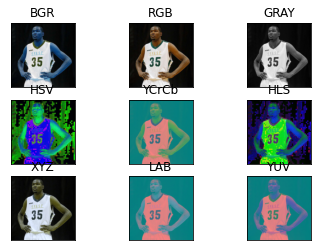

In [55]:
# 下面代碼有九慟常見的顏色空間，BGR、RGB、GRAY、HSV、YCrCb、HLS、XYZ、LAB和YUV
import cv2 
import numpy as np 
import matplotlib.pyplot as plt

#讀取原始圖像
img_BGR = cv2.imread('durant.jpg')

#BGR轉为RGB
img_RGB = cv2.cvtColor(img_BGR, cv2.COLOR_BGR2RGB)

#灰度化處理
img_GRAY = cv2.cvtColor(img_BGR, cv2.COLOR_BGR2GRAY)
 
#BGR轉HSV
img_HSV = cv2.cvtColor(img_BGR, cv2.COLOR_BGR2HSV)
 
#BGR轉YCrCb
img_YCrCb = cv2.cvtColor(img_BGR, cv2.COLOR_BGR2YCrCb)
 
#BGR轉HLS
img_HLS = cv2.cvtColor(img_BGR, cv2.COLOR_BGR2HLS)
 
#BGR轉XYZ
img_XYZ = cv2.cvtColor(img_BGR, cv2.COLOR_BGR2XYZ)
 
#BGR轉LAB
img_LAB = cv2.cvtColor(img_BGR, cv2.COLOR_BGR2LAB)
 
#BGR轉YUV
img_YUV = cv2.cvtColor(img_BGR, cv2.COLOR_BGR2YUV)

#調用matplotlib顯示處理結果
titles = ['BGR', 'RGB', 'GRAY', 'HSV', 'YCrCb', 'HLS', 'XYZ', 'LAB', 'YUV'] 
images = [img_BGR, img_RGB, img_GRAY, img_HSV, img_YCrCb,
          img_HLS, img_XYZ, img_LAB, img_YUV] 

for i in range(9):
    plt.subplot(3,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()    


In [56]:
# 查看參數全部類型
import cv2
flags = [i for i in dir(cv2) if i.startswith('COLOR_')]
print(flags)

['COLOR_BAYER_BG2BGR', 'COLOR_BAYER_BG2BGRA', 'COLOR_BAYER_BG2BGR_EA', 'COLOR_BAYER_BG2BGR_VNG', 'COLOR_BAYER_BG2GRAY', 'COLOR_BAYER_BG2RGB', 'COLOR_BAYER_BG2RGBA', 'COLOR_BAYER_BG2RGB_EA', 'COLOR_BAYER_BG2RGB_VNG', 'COLOR_BAYER_GB2BGR', 'COLOR_BAYER_GB2BGRA', 'COLOR_BAYER_GB2BGR_EA', 'COLOR_BAYER_GB2BGR_VNG', 'COLOR_BAYER_GB2GRAY', 'COLOR_BAYER_GB2RGB', 'COLOR_BAYER_GB2RGBA', 'COLOR_BAYER_GB2RGB_EA', 'COLOR_BAYER_GB2RGB_VNG', 'COLOR_BAYER_GR2BGR', 'COLOR_BAYER_GR2BGRA', 'COLOR_BAYER_GR2BGR_EA', 'COLOR_BAYER_GR2BGR_VNG', 'COLOR_BAYER_GR2GRAY', 'COLOR_BAYER_GR2RGB', 'COLOR_BAYER_GR2RGBA', 'COLOR_BAYER_GR2RGB_EA', 'COLOR_BAYER_GR2RGB_VNG', 'COLOR_BAYER_RG2BGR', 'COLOR_BAYER_RG2BGRA', 'COLOR_BAYER_RG2BGR_EA', 'COLOR_BAYER_RG2BGR_VNG', 'COLOR_BAYER_RG2GRAY', 'COLOR_BAYER_RG2RGB', 'COLOR_BAYER_RG2RGBA', 'COLOR_BAYER_RG2RGB_EA', 'COLOR_BAYER_RG2RGB_VNG', 'COLOR_BGR2BGR555', 'COLOR_BGR2BGR565', 'COLOR_BGR2BGRA', 'COLOR_BGR2GRAY', 'COLOR_BGR2HLS', 'COLOR_BGR2HLS_FULL', 'COLOR_BGR2HSV', 'COLOR_

### 這是參考
https://github.com/Ayonveig/pycv-training

https://github.com/LeBron-Jian/ComputerVisionPractice
